## Week 3 Lab exercises

In this week we will explore the concept of object oreinted programming (OOP) with classes, and the numerical solution of simple non linear ordinary differential equations (ODEs). 

In [1]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 
I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it. 

Here you will write another class object for a Rectangle. You should consider and implement the following points:

1. What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

2. Implement functions to:

    a. reflect the rectangle in the x and y axes
    
    b. grow the rectangle by an amount in x and y with the bottom left corner fixed
    
    c. grow the rectangle by an amount in x and y with the top right corner fixed
    
    d. plot the rectangle


3. What should be checked here? Can you add some asserts? Do you need to test the functions?

4. Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!

Point  P is 1.0 2.0
Point  Q is 4.0 7.5
Point  R is 5.0 9.5
Distance is  6.264982043070834
42


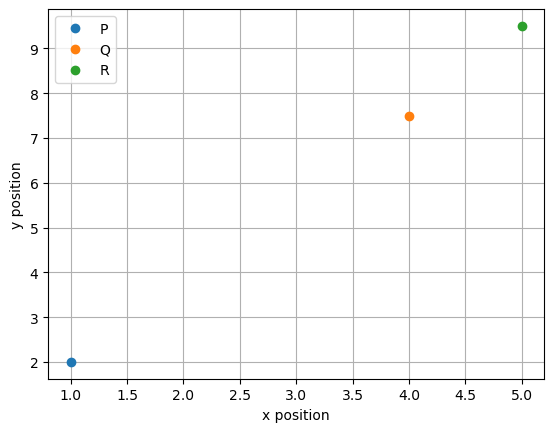

In [33]:
# Points class

class Point :
    """
    Represents a point in a 2D space
    
    attributes: x, y, name
    
    """
    
    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    def __init__(self, x=0.0, y=0.0, name = ""): #initialize an instance of the class
        self.x = x
        self.y = y
        self.name = name
        self.__private_variable = 42
        
    def __add__(self, other) : #adds objects of the class
        new_point = Point(self.x+other.x, self.y+other.y)
        return new_point
    
    def print_point(self) :
        print("Point ", self.name, "is", self.x, self.y)
        
    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B) :
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)
    
    def move_point(self,dx,dy) :
        self.x = self.x + dx
        self.y = self.y + dy
        
    def plot_point(self, ax) :
        ax.plot(self.x, self.y, 'o', label=self.name)
        
    def update_name(self, new_name) :
        self.name = new_name

    def reflect_point_about_axis(self, axis='') : # function to reflect points about axis so that can reflect the rectangle
        # This will swap the point's coordinates 
        if axis == 'x':
            self.y = - self.y
        elif axis == 'y':
            self.x = - self.x
        else:
            False, 'invalid axis'

        
# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.print_point()

second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()

# Try to access the private variable, even though you shouldn't
#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?

In [48]:
# Rectangle class
# UPDATE ME!

class Rectangle : # we need 1 array for each side of the rectangle and to define the angle between the sides
    """
    Represents a rectangle in 2D space

    Bottom-left point fixed
    Top-right point fixed
    The edges are aligned with the x and y axes

    methods: 
        print the points
        a. reflect the rectangle in the x and y axes
        b. grow the rectangle by an amount in x and y with the bottom left corner fixed
        c. grow the rectangle by an amount in x and y with the top right corner fixed
        d. plot the rectangle
    
    attributes: bottom_left_point, top_right_point
    
    """
    
    # constructor function
    def __init__(self, bottom_left_point=Point(), top_right_point=Point()): #initialize an instance of the class using the Point class
        self.bottom_left_point = bottom_left_point
        self.top_right_point = top_right_point
        self.check_rectangle()
        
    #def area(self) : 
       # area_of_rectangle = self.length * self.width
        # return area_of_rectangle

    #def perimeter(self) : 
      #  perimeter_of_rectangle = 2 * (self.length + self.width)
      #  return perimeter_of_rectangle
    
    def print_rectangle(self) : # can use functions from the Point class since the bottom left & top right points are instances of it
        print("Rectangle's points are : ")
        bottom_left_point.print_point() #Recall bottom_left_point=Point() thus can call function of the Point class on them
        top_right_point.print_point()
        
    def reflect_rectangle_about_axis(self, axis='x') : #need to reflect points about axis before I reflect the rectangle
        self.bottom_left_point.reflect_point_about_axis(axis)
        self.top_right_point.reflect_point_about_axis(axis)
        if axis == 'x' :
            # swap y points
            old_bottom_y = self.bottom_left_point.y
            old_top_y = self.top_right_point.y
            self.bottom_left_point.y = old_top_y
            self.top_right_point.y = old_bottom_y
        elif axis == 'y' :
            old_bottom_x = self.bottom_left_point.x
            old_top_x = self.top_right_point.x
            self.bottom_left_point.x = old_top_x
            self.top_right_point.x = old_bottom_x           
        else :
            assert False, 'Invalid axis chosen, must be x or y'
        return 

    def develop_rectangle_sides(self, dx, dy, corner='top_right') : # function to grow the sides of the rectangle
        if corner == 'bottom_left' :
            self.bottom_left_point.move_point(-dx,-dy) #move_point() moves a point by dx in the x-axis and by dy in the y-axis
        elif corner == 'top_right' :
            self.top_right_point.move_point(dx,dy)
        else :
            assert False, 'Invalid fixed corner chosen, must be top_right or bottom_left'
        return 

    def plot_rectangle(self, ax, rectangle_label=""):
        
        x_points = np.array([self.bottom_left_point.x, self.bottom_left_point.x,
                             self.top_right_point.x,   self.top_right_point.x,
                             self.bottom_left_point.x])
        
        y_points = np.array([self.bottom_left_point.y, self.top_right_point.y,
                             self.top_right_point.y,   self.bottom_left_point.y,
                             self.bottom_left_point.y])
        
        ax.plot(x_points, y_points, '-', label=rectangle_label)

# Defensive programming check that points still make sense    
    def check_rectangle(self) :
        assert self.bottom_left_point.x < self.top_right_point.x, 'bottom left point must be left of top right'
        assert self.bottom_left_point.y < self.top_right_point.y, 'bottom left point must be below top right'

Point  P is 1.0 2.0
Point  Q is 10.0 5.5
Point  P is -13.0 -9.5
Point  Q is 1.0 1.0


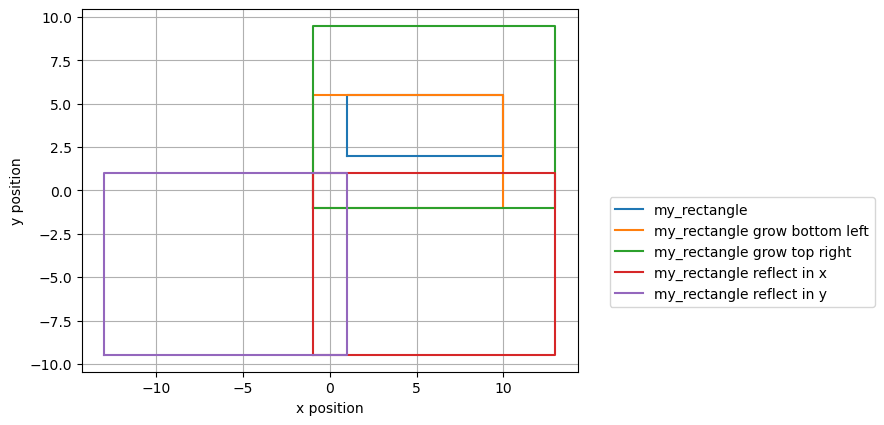

In [49]:
# Tests - should strictly write these first!
first_point = Point(1.0,2.0,"P")
first_point.print_point()

second_point = Point(10.0,5.5,"Q")
second_point.print_point()

# Class object created
my_rectangle = Rectangle(first_point, second_point)

# This one throws an error
#my_rectangle = Rectangle(second_point, first_point)

# Try the plotting
plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
my_rectangle.plot_rectangle(ax,"my_rectangle")
ax.set_aspect('equal')

# Grow bottom left
my_rectangle.develop_rectangle_sides(2.0,3.0,'bottom_left') #move bottom left point by -dx=-2, -dy=-3 -> (-1,-1) point
my_rectangle.plot_rectangle(ax,"my_rectangle grow bottom left")
my_rectangle.check_rectangle()

# Grow top right
my_rectangle.develop_rectangle_sides(3.0,4.0,'top_right') #move top right point by dx=3, dy=4 -> (6,
my_rectangle.plot_rectangle(ax,"my_rectangle grow top right")
my_rectangle.check_rectangle()

# Reflect in x
my_rectangle.reflect_rectangle_about_axis('x') # now my_rectangle is the green one with P=(-1,-1) and Q=(13,9.5)
                                               # so the points reflect upon the x axis and change signs of y (coordinates don't swap):
                                               # (-1,-1)->(-1,1), (-1,9.5)->(-1,-9.5), (13,-1)->(13,1), (13,9.5)->(13,-9.5) 
my_rectangle.plot_rectangle(ax,"my_rectangle reflect in x")
my_rectangle.check_rectangle()

# Reflect in y
my_rectangle.reflect_rectangle_about_axis('y') # now my_rectangle is the red one with bottom_left=(-1,-9.5) and top_right=(13,1)
my_rectangle.plot_rectangle(ax,"my_rectangle reflect in y") #so the points reflect upon the y axis, change signs of x
                                                            # (-1,-9.5)->(1,-9.5), (13,1)->(-13,1), (-1,1)->(1,1), (13,-9.5)->(-13,9.5)
my_rectangle.check_rectangle()

# Add legend to plot
plt.legend(bbox_to_anchor=(1.05, 0.5))

# Print the location of the points after the rectangle methods are applied
# Note that these have now moved with the transformation!
first_point.print_point()
second_point.print_point()

### ACTIVITY 2: 

Now create a Square class that has the same functionality as the rectangle class, but that in addition has the ability to calculate its own area. You are not allowed to modify the Rectangle class.

_HINT: Do you really need to write a whole new function from scratch? What about inheritance?_


In [37]:
# Square class

# UPDATE ME

class Square(Rectangle) :
    
    """
    A square is a rectangle, defined by its bottom left and a side length
    
    """
    
    # constructor function
    def __init__(self, bottom_left_point=Point(), side_length=1.0):

        top_right_point = Point(bottom_left_point.x+side_length, bottom_left_point.y+side_length)
        
        self._bottom_left_point = bottom_left_point
        self._top_right_point = top_right_point
        self._side_length = top_right_point.x - bottom_left_point.x

    def calculate_area(self) : 
        area_of_square = self._side_length * self._side_length
        return area_of_square

    # Useful for output and to check squareness
    def print_and_check_square(self) :
        
        is_square = ((self._top_right_point.x - self._bottom_left_point.x ==
                      self._top_right_point.y - self._bottom_left_point.y) and
                     (self._top_right_point.x - self._bottom_left_point.x ==
                      self._side_length))
        
        assert is_square, 'There is a problem, object is no longer a square'
        
        # Also check ordering of points
        self.check_rectangle()
        
        print("Square has its bottom corner at:")
        self._bottom_left_point.print_point()
        print("Side length is : " + str(self._side_length))
            
    # Make a new method for growing from corners for squares
    def grow_square_from_corner(self, dx, moved_corner='top_right') :
        self.develop_rectangle_sides(dx, dx, moved_corner)   
        # In both cases need to adjust the side length too
        self._side_length += dx

In [38]:
# Test the square
first_point = Point(1.0,2.0,"P")
my_square = Square(first_point, 2.0)

# These should raise an error
second_point = Point(10.0,5.5,"Q")
#my_square.top_right_point = second_point
#my_square.bottom_left_point = second_point

# Print it
my_square.print_and_check_square()

# Plot it
plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
my_square.plot_rectangle(ax,"my_square initially")
ax.set_aspect('equal')

# Can reset the side length, which also resets the top right point
my_square.side_length = 4.0
my_square.plot_rectangle(ax,"change side length")
my_square.print_and_check_square()

# Test some of the reflections
my_square.reflect_rectangle_about_axis('y')
my_square.plot_rectangle(ax,"reflect in y")
my_square.print_and_check_square()

my_square.reflect_rectangle_about_axis('x')
my_square.plot_rectangle(ax,"reflect in x")
my_square.print_and_check_square()

# Now the growing method
my_square.grow_square_from_corner(1.0, moved_corner='top_right')
my_square.plot_rectangle(ax,"grow from top right corner")
my_square.print_and_check_square()

my_square.grow_square_from_corner(-1.0, moved_corner='bottom_left')
my_square.plot_rectangle(ax,"shrink bottom left corner")
my_square.print_and_check_square()

# Test area
area = my_square.calculate_area_square()
print("Area is", area)

# Add legend to the plot
plt.legend(bbox_to_anchor=(1.05, 0.5));

AttributeError: 'Square' object has no attribute 'bottom_left_point'

### ACTIVITY 3:

Now we wil consider a simpled coupled ODEs: the Lotka-Volterra equations describe predator-prey relations, where some species $x$ (e.g. a fox) eats another species $y$ (e.g. rabbits), and each population grows by breeding at a rate proportional to its number. The resulting evolution is described by the following first order, autonomous, non linear, coupled system of ordinary differential equations:

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

What parts or features of the differential equation tell us that it is:
1. First order
2. Autonomous
3. Non linear
4. Coupled 

?

Answers:
1. Derivatives are of first order
2. There is no term multiplied by t, thus dependent on t.
3. There are terms with x and y together which are nonlinear
4. The ODE on x contains terms with y and the ODE on y contains terms with x

### ACTIVITY 4:

The following code solves the Logistic Equation 

$\frac{dy}{dt} = y (1 - y)$

Using a simple explicit integration and the scipy function solve_ivp() which used Runge-Kutta 4th/5th order time integration. Copy it and update it to solve instead the Lotka-Volterra equations. 

Note the following:

1. Why do I substract delta_t when calculating the vector of t_solution points?
2. the solve_ivp method uses the labels t and y for the independent and dependent variables. The y value is assumed to be a vector, allowing you to solve for multiple dependent variables at once, e.g. you can make it np.array([x,y])

/var/folders/34/d97grh111731x7mh7g0tzz7w0000gn/T/ipykernel_12475/2937276196.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_solution[0] = y0


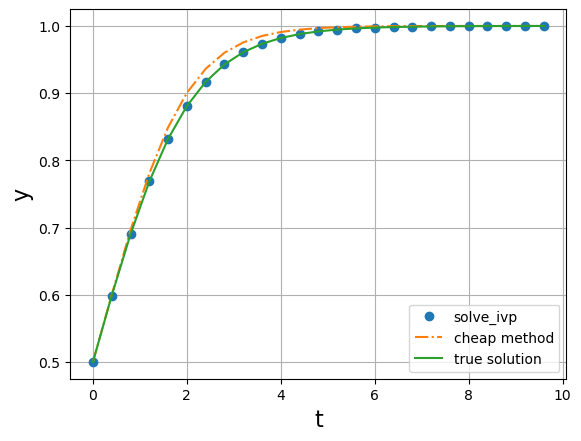

In [39]:
# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 25
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
y_solution = np.zeros_like(t_solution)
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_logistic_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
A = 1.0/y0 - 1.0
y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
plt.plot(t_solution, y_true, '-', label="true solution")
plt.legend(loc='best');

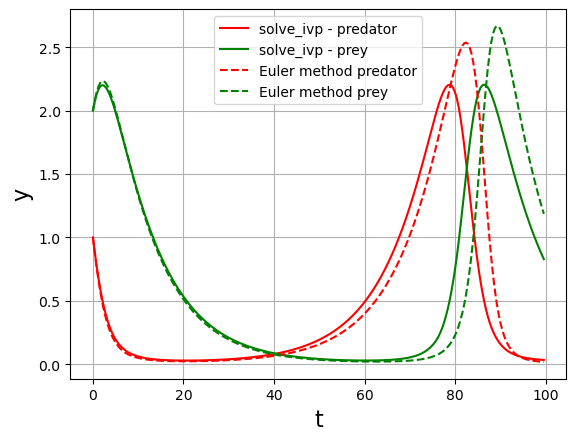

In [46]:
# Your solution here for the predator-prey equations !

# UPDATE ME!

# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_Lotka_Volterra_dydt(t, y):
    """Returns the gradient dy/dt for the predator-prey equations"""
    a=0.1
    b=0.2
    c=0.1
    d=0.2
    
    predators = y[0]
    prey = y[1]

    dydt = np.zeros_like(y) #bc it is a system of equations
    dydt[0] = a*predators - b*predators*prey
    dydt[1] = -c*prey + d*predators*prey
    
    return dydt

max_time = 100.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([1.0, 2.0]) # an initial condition, for y[0] and y[1], note it needs to be an array

solution = solve_ivp(calculate_Lotka_Volterra_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'r-', label="solve_ivp - predator")
plt.plot(solution.t, solution.y[1], 'g-', label="solve_ivp - prey")

# Now do it using Euler's method
# increase the number of steps to see how the solution changes
y_solution = np.zeros([N_time_steps, 2])
y_solution[0][:] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_Lotka_Volterra_dydt(time, y_solution[itime-1][:])
        y_solution[:][itime] = y_solution[itime-1][:] + dydt * delta_t
    
plt.plot(t_solution, y_solution[:,0], 'r--',label="Euler method predator")
plt.plot(t_solution, y_solution[:,1], 'g--',label="Euler method prey")
plt.legend(loc='best');

### ACTIVITY 5:

Find the equilibrium value of rabbits and foxes such that you do not get oscillations.

_HINT: You can do this by trying different initial values of the rabbits and foxes, but it may help to also plot the solutions of x versus y for different values of the initial conditions and identify if there is a trend_

In [118]:
# Plot some solutions of x versus y

# HINT: plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")

### ACTIVITY 6:

If you double the resolution in the simple integrator, what happens to the error in the solution compared to solve_ivp? Why? How could you improve this behaviour?

In [119]:
# Compare the errors here

# HINT: plt.plot(solution.t, solution.y[0] - y_solution, '--', label="error versus solve_ivp, dt = ??")

### ACTIVITY 7:

The predator - prey equations have been cast above in a _functional coding_ style. Can you imagine a way to cast them in a more OOP way?

_HINT: There are several ways this could be done, but consider writing an Ecosystem class - what would be the attributes and methods that would live in such a class?_

OPTIONAL: Implement it!

A: UPDATE ME!

In [24]:
# Implementation of the Ecosystem class (OPTIONAL)
